Exercises in coalescent theory
===============

## Exercise	A:	Simulating	a	coalescence	tree	assuming	a	constant	population	size
(Based on notes by Ida Moltke)

The	purpose	of	this first	exercise	is	to	make	sure	it	is	clear	how	a	coalescence tree	is	simulated. We will use R so a little familiarity with this language will help. First, let	us try to	simulate	a	coalescence tree	for	five samples by	hand:

1. Start	by	drawing	on a piece of paper a	small circle	for	each	of	the	five	samples. They should be lined up on	an	invisible horizontal line	and you should leave enough	space	above the circles for	
drawing	a	tree	above them (which we will do shortly).	We will henceforth call these five circles "nodes" and label them 1,2,3,4,5

Example:
<img src="https://raw.githubusercontent.com/FerRacimo/CopenhagenTutorial/master/CoalSimul1.jpeg" alt="Example" width="300"/>


2. Also,	make	a	list	of	the	node	names.	You	can	either	do	this	by	hand	or	you	can	do	it	in	R	by	
simply	writing:


In [3]:
nodes = c(1,2,3,4,5) # make the list and call it nodes
nodes # print the list

[1] 1 2 3 4 5

3. Sample	which	two	nodes	will	coalesce	first	(going	back	in	time)	by	randomly	picking	two	of	the	
nodes.	You	can	either	do	this	by	hand	or	you	can	do	it	in	R	by	typing:

In [4]:
nodecount = length(nodes) # save the number of nodes in the variable nodecount
tocoalesce = sample(1:nodecount, size=2) # sample 2 different nodes in node list
nodes[tocoalesce[1]] # print the first node sampled
nodes[tocoalesce[2]] # print the second node sampled

[1] 3

[1] 1

If	you	used	R	then	make	sure	you	understand	what	the	R	code	does	before	moving	on.

4. Sample	the	time	it	takes	before	these	two	nodes	coalesce	(measured	from	previous	
coalescence	event in	units	of	2N)	by	sampling	from	an	exponential	distribution	with	rate	equal	
to	"nodecount choose 2" (expressed in R as `choose(nodecount,2)` ) where	nodecount	is	the	number	of	nodes	in	your node	list.	Do	
this	in	R	by	typing:

In [5]:
coalescencerate = choose(nodecount,2) # calculate the coalescent rate
coalescencetime = rexp(1, rate=coalescencerate) # sample from exponential w. that rate
coalescencetime

[1] 0.713014


Make sure	you	understand	what	the	R	code	does	before	moving	on.

5. Now, in your piece of paper,	draw	a	node	that	is	the	sampled amount	of	time	further	up	in	the	tree	than	the currently	
highest node	(so	if	the	currently	highest	node	is	drawn	at	height	T	then	draw	the	new	one	at	
height	T plus the	sampled	coalescence	time)	and	draw	a	branch	from	each	of	the	nodes	you	
sampled	in	step	3	to	this	new	node	indicating	that	these	two	nodes	coalesce at	this	time.	

Example:
<img src="https://raw.githubusercontent.com/FerRacimo/CopenhagenTutorial/master/CoalSimul2.jpeg" alt="Example" width="300"/>

6. Next,	make	an	updated	list	of	the	nodes	that	are	left	by	removing	the two	nodes	that	
coalesced	and	instead	adding	the	newly	drawn	node	that represents	their	common	ancestor.	
You	can	call	the	new	node	the	next	number	not	used	as	a	name	yet	(e.g. if	this	is	the	first	
coalescence event you	can	call	it	6, if	it	is	the	second	coalescence	event you	can	call	it	7	etc.).	
You	can	either	do	this	by	hand	or	in	R.	If	you	want	to	do	it	R	you	can	do	it	as	follows:


In [6]:
nodes <- nodes[-tocoalesce] # remove the two nodes that coalesced
nodes <- c(nodes,2*5-length(nodes)-1) # add the new node
nodes # print the new list

[1] 2 4 5 6

If	you	used	R	then	make	sure	you	understand	what	the	R	code	does	before	moving	on.

7. If	you	only	have	one	node	left	in	your	list	of	remaining	nodes	you	are	done.	If	not,	go	back	to	
step	3.	

In	the	end you	should	have	a	tree,	which	is	a	simulation	of	a	coalescence	tree. Try	to	do	this	a	
couple times	until	you	feel	like	you	know	how	it	is	done	and	understand	how the coalescence process works	(if after	drawing	a	few	trees still	don’t	understand,	then	feel	free	to	ask for	help!).

## Exercise B: Simulating and plotting coalescent trees along a genomic sequence


Generating a tree by hand is obviously a bit tedious.	Let's now take advantage of existing simulation software to generate not just one tree, but a whole sequence of trees! In this section, we will simulate a set of genomes evolving in a simple, constant-sized population. We will use the slendr R library and the msprime simulation engine. We will then extract and plot various coalescent trees from our simulation, to see how different individuals are related to each other in different parts of the genome.

We first load the required libraries. These include slendr, a plotting library (ggplot2), a data manipulation library (dplyr) and the ape library for tree plotting.


In [7]:
#### Some extra stuff to help slendr work on the in the notebook
Sys.setenv(CONDA_PREFIX = "/opt/tljh/user/envs/slendr-env")
Sys.setenv(RETICULATE_PYTHON = "/opt/tljh/user/envs/slendr-env/bin/python")  # Optional but helps force the python path
Sys.setenv(MPLBACKEND = "Agg")  # Force safe headless backend

library(reticulate)
use_condaenv("/opt/tljh/user/envs/slendr-env", required = TRUE)
use_python("/opt/tljh/user/envs/slendr-env/bin/python", required = TRUE)

system("conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/main")
system("conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/r")
library(slendr)
setup_env(agree=T, pip=T)
init_env()
####

library(ggplot2)
library(dplyr)
library(ape)

accepted Terms of Service for https://repo.anaconda.com/pkgs/main
accepted Terms of Service for https://repo.anaconda.com/pkgs/r


In order to use spatial features of slendr, packages 'sf', 'stars',
and 'rnaturalearth' are required but not all are present.

You can install all of them with
  `install.packages(c("sf", "stars", "rnaturalearth"))`.
--------------------

A required slendr Python environment is already present. You can activate
it by calling init_env().

Warning message:
“Previous request to `use_python("/opt/tljh/user/envs/slendr-env/bin/python", required = TRUE)` will be ignored. It is superseded by request to `use_python("/home/jupyter-thomas/.local/share/r-miniconda/envs/Python-3.12_msprime-1.3.4_tskit-0.6.4_pyslim-1.0.4_tspop-0.0.2/bin/python")”
Warning message:
“The request to `use_python("/home/jupyter-thomas/.local/share/r-miniconda/envs/Python-3.12_msprime-1.3.4_tskit-0.6.4_pyslim-1.0.4_tspop-0.0.2/bin/python")` will be ignored because the environment variable RETICULATE_PYTHON is set to "/opt/tljh/user/envs/slendr-env/bin/python"”
The interface to all required Python modules has been activate

We set the seed to a specific number (101) for reproducibility of results. Note that this means we will all get the same results. You can try to see what happens when you use a different seed relative to your partner.


In [8]:
set.seed(101)


We will simulate a very simple demographic model in slendr, with just 1 population of size 1,000.

In [9]:
popA <- population("A", time = 6.5e6, N = 1000)
model <- compile_model(
  populations = list(popA),
  generation_time = 30,
  path = paste0(tempfile(), "_basic"),
  direction = "backward"
)

We can plot this model to see what it looks like (SPOILER: it won't be very interesting).

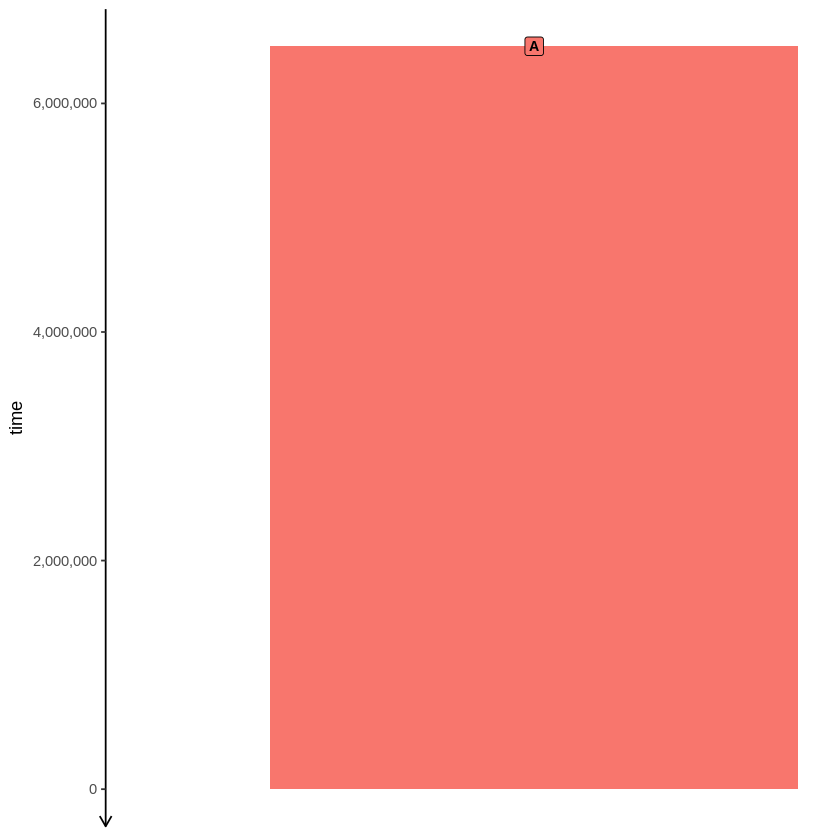

In [10]:
plot_model(model, sizes = FALSE)

We specify the number of samples we want to simulate. In this case, we will sample 5 (diploid) individuals from the present-day.

In [11]:
present_samples <- schedule_sampling(model, times = 0, list(popA, 5))

We ca now run our simulation, calling msprime (a backward coalescent simulator). We simulate a sequence of length 10 megabases, with a recombination rate similar to the one observed in humans (on average, 10^-8 recombination events per basepair). Note that we need not specify a mutation rate, as we're only interested in the coalescent trees in our simulation, not on the sequences themselves.


In [12]:
ts <- msprime(
  model, sequence_length = 10e6, recombination_rate = 1e-8,
  samples = present_samples,
  random_seed = 101, verbose = TRUE
)

The ts object now contains a "tree-sequence", i.e. a series of coalescent trees that specify how individuals are related to each other across the simulated sequence. We can obtain individual trees from this sequence using the function "ts_phylo". The first tree can be obtained and plotted as shown below.  Note that the trees are 0-indexed, i.e. the first tree is the tree number "0", the second is number "1", the third is number "2", etc. This is why we write "i=0" to extract the first tree.


Starting checking the validity of tree...
Found number of tips: n = 10 
Found number of nodes: m = 9 
Done.


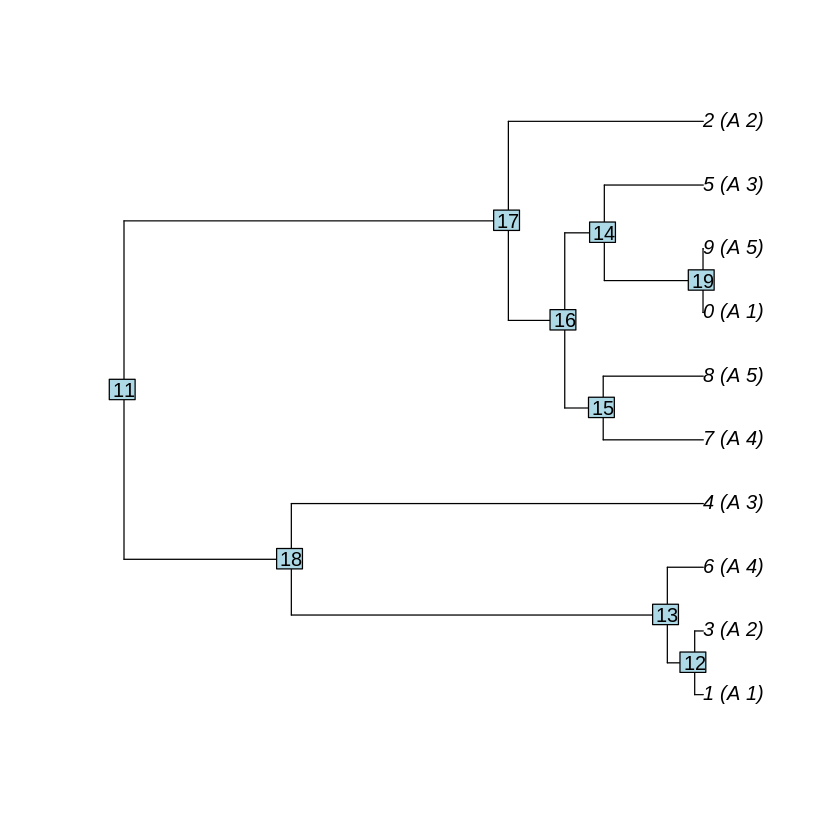

In [13]:
tree.1 <- ts_phylo(ts, i=0)
plot(tree.1)
nodelabels()


The numbers in each leaf node refer to each sampled lineage. Because we're sampling diploids, the number in parenthesis refers to the diploid individual to which that lineage belongs to.

Can you plot the second tree in the sequence? How about the 10th tree? And the 1000th tree? If not, why not?


## Exercise C: One or two populations? 

Imagine	the	following	case:	a	researcher	has	estimated	the	structure	of	a	tree	for	
mtDNA	from	a	species	sampled	in	a	single	location.	She	obtains	a	tree	looking	as	follows:

![alt text](https://raw.githubusercontent.com/FerRacimo/CopenhagenTutorial/master/Tree0.png)

Based	on	the	structure	of	the	tree,	i.e.	two	groups	of	related	individuals	separated	by	long	
branches	down	to the	root	of	the	tree,	she	concludes	that	there	must	be population	
subdivision	with	two	clearly	differentiated	groups.	 Based	on	what	you	have	learned	from	
the	simulations,	do	you	agree	with	this	conclusion?